# Expoloratory Data Analysis (EDA)

**Justina Nguyen**<br>
**June 2023**<br>
**BrainStation**

## Introduction

In this notebook, we will create some visualizations to gain insights regarding the distribution of the ratings and the number of reviews.

***

## Table of Contents

- [The Dataset](#the-dataset)
- [Exploratory Data Analysis (EDA)](#eda)
- [Conclusion](#conclusion)

***

## The Dataset <a class="anchor" id="the-dataset"></a>

Let's import the relevant packages to analyze the data.

In [30]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Let's take a look at the dataset.

In [31]:
cd /Users/justinanguyen/Desktop/BrainStation/Projects/Capstone/Justina_Nguyen_Capstone_Submission

/Users/justinanguyen/Desktop/BrainStation/Projects/Capstone/Justina_Nguyen_Capstone_Submission


In [32]:
# Reading the csv file into a dataframe
drug_df = pd.read_csv('./clean_preprocessed_drug_reviews.csv',index_col=0)

# Checking the first 5 rows of the dataframe
drug_df.head()

,uniqueID,duration,date,drugName,review,rating,upvotes,drug,page
0,jwillou,Taken for less than 1 month,"February 27, 2023",Wegovy (semaglutide),I have been taking Wegovy for 1 week and 2 day...,10,622,semaglutide,1
1,Slow...,Taken for 1 to 6 months,"April 3, 2023",Wegovy (semaglutide),Starting week 9 with the second injection of 1...,7,216,semaglutide,1
2,KS in...,Taken for 1 to 6 months,"April 18, 2023",Wegovy (semaglutide),Tomorrow I will take my 3rd shot of .5mg (prev...,10,167,semaglutide,1
3,Smithy...,Taken for 1 to 6 months,"March 14, 2023",Ozempic (semaglutide),I was hesitant to try Ozempic for weight loss ...,10,231,semaglutide,1
4,Philly,Taken for 6 months to 1 year,"February 6, 2022",Wegovy (semaglutide),6 months. -65 pounds. Hypertension gone. Pre D...,10,709,semaglutide,1


In [33]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4733 entries, 0 to 5232
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uniqueID  4733 non-null   object
 1   duration  4733 non-null   object
 2   date      4733 non-null   object
 3   drugName  4733 non-null   object
 4   review    4733 non-null   object
 5   rating    4733 non-null   int64 
 6   upvotes   4733 non-null   int64 
 7   drug      4733 non-null   object
 8   page      4733 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 369.8+ KB


In [34]:
print(f'This dataset has {drug_df.shape[0]} rows and {drug_df.shape[1]} columns.')

This dataset has 4733 rows and 9 columns.


***
## Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

We want to explore the data to see if we can gain any insights on the `rating` and `review` columns.

Let's first see if we can visualize the how many reviews were created by brand name drugs each year. The `date` column is currently in non-numerical format. We can just convert that to datetime format.

In [35]:
# Changes date column to datetime format
drug_df['date'] = pd.to_datetime(drug_df['date'])

# Extracts the year and month from the date column
drug_df['year'] = drug_df['date'].dt.year 
drug_df['month'] = drug_df['date'].dt.month 

Now, we can calculate the frequency of each brand name drug per year and plot the results.

In [36]:
all_reviews = []
for drug_name in drug_df['drugName'].unique():
    # Contains only the rows where the 'drugName' column matches a specific drug name
    tmp = drug_df[drug_df['drugName'] == drug_name]
    # Calculates the frequency of each unique rating value,
    # sorts the values by the rating index, and resets the index
    tmp = tmp['year'].value_counts().sort_index().reset_index()
    # Adds column to include drug name
    tmp['drugName'] = drug_name
    # Appends dataframe to list
    all_reviews.append(tmp)

# Merges all the dataframes together
all_reviews_df = pd.concat(all_reviews)
# Renames columns of new dataframe
all_reviews_df = all_reviews_df.rename(columns = {"index": "year", "year": "total_reviews"})

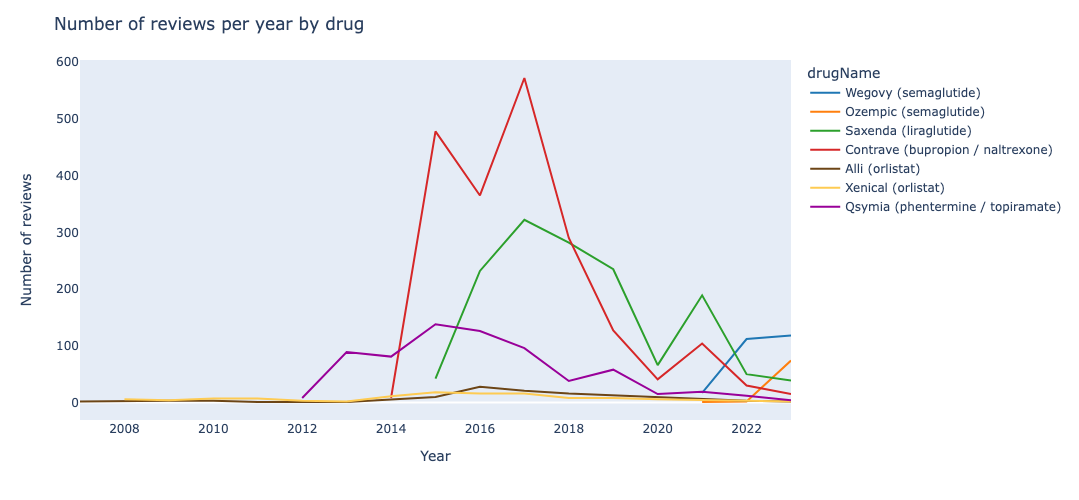

In [75]:
# Define a custom color sequence
color_seq = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#6c4516", "#fecb52", "#990099"]

# Create the plot
fig = px.line(all_reviews_df, x='year', y='total_reviews', color='drugName', color_discrete_sequence=color_seq)

# Update the layout with the plot title
fig.update_layout(
    title='Number of reviews per year by drug',
    xaxis={'title': 'Year'},
    yaxis={'title': 'Number of reviews'}
)

# Adjust the plot configuration settings
fig.update_layout(
    autosize=False,
    width=950,  # Set the width to 950 pixels
    height=500,  # Set the height to 500 pixels
    yaxis=dict(showgrid=False),  # Remove the gridlines on the y-axis
    xaxis=dict(showgrid=False),  # Remove the gridlines on the x-axis
)

# Show the plot
fig.show()

We see that there is an imbalance in the number of reviews per brand name drug. This makes sense because drugs are approved by the FDA and put on the market at different times. Those that were approved early on would have more reviews.

If we look at 2022, we see that the reviews for all the other drugs besides Wegovy and Ozempic were decreasing, while the amount of reviews for Wegovy and Ozempic were increasing. It is good to note that Ozempic has a linear slope which may suggest that consumers will write reviews as they continue to take this drug off label for weight loss.

Next, we can look at the overall ratings by drug and plot the results.

In [38]:
all_ratings = []
for drug_name in drug_df['drugName'].unique():
    # Contains only the rows where the 'drugName' column matches a specific drug name
    tmp = drug_df[drug_df['drugName'] == drug_name]
    # Calculates the frequency of each unique rating value, normalizes the counts to proportions, 
    # sorts the values by the rating index, and resets the index
    tmp = tmp['rating'].value_counts(normalize=True).sort_index().reset_index()
    # Adds column to include drug name
    tmp['drugName'] = drug_name
    # Appends dataframe to list
    all_ratings.append(tmp)

# Merges all the dataframes together
all_ratings_df = pd.concat(all_ratings)
# Renames columns of new dataframe
all_ratings_df = all_ratings_df.rename(columns={"index": "rating", "rating": "relative_frequency"})

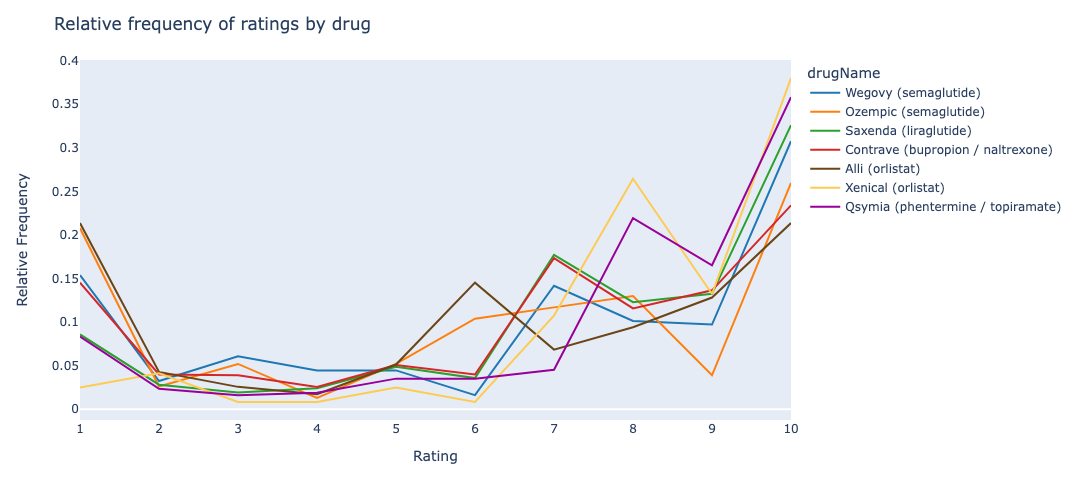

In [76]:
# Create the plot
fig = px.line(all_ratings_df, x='rating', y='relative_frequency', color='drugName', color_discrete_sequence=color_seq)

# Update the layout with the plot title
fig.update_layout(
    title='Relative frequency of ratings by drug',
    xaxis={'title': 'Rating'},
    yaxis={'title': 'Relative Frequency'}
)

# Adjust the plot configuration settings
fig.update_layout(
    autosize=False,
    width=950,  # Set the width to 800 pixels
    height=500,  # Set the height to 500 pixels
    yaxis=dict(showgrid=False),  # Remove the gridlines on the y-axis
    xaxis=dict(showgrid=False),  # Remove the gridlines on the x-axis
)

# Show the plot
fig.show()

As typically seen in reviews, the ratings for each drug tend to gravitate towards both ends of the spectrum.

Now, we want to see what the distribution of the average rating is for each brand name drug.

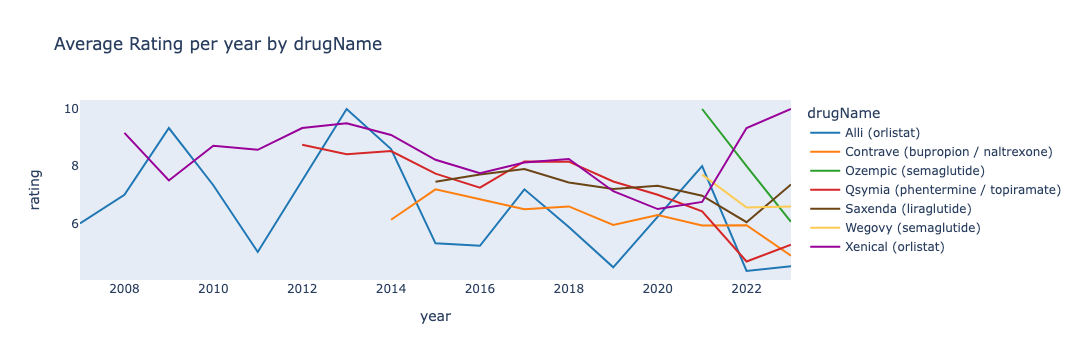

In [77]:
# Calculate the average rating per year by drugName
avg_rating_per_year = drug_df.groupby(['drugName', 'year'])['rating'].mean().reset_index()

# Plot the average rating per year by drugName
fig = px.line(avg_rating_per_year, 
              x='year', y='rating', 
              color='drugName', 
              title='Average Rating per year by drugName',
              color_discrete_sequence=color_seq)

# Update figure size and hide gridlines
fig.update_layout(yaxis=dict(showgrid=False),  # Remove the gridlines on the y-axis
                  xaxis=dict(showgrid=False),  # Remove the gridlines on the x-axis
                 )

# Show plot
fig.show()

The average rating per year by drug consistently surpasses 5 each year.

## Conclusion <a class="anchor" id="conclusion"></a>

Through the visualizations of the distribution of data, we notice that there are data imbalances in our data set that should be considered during analysis.